In [6]:
def testf(x):
    print("testf", x)


def return2():
    return 1

testf(*return2())

TypeError: __main__.testf() argument after * must be an iterable, not int

In [7]:
import torch
import numpy as np

path = "/nas-data/datasets/FastMRI-brain/sorted/c16_size320_T2/traincrop320/file_brain_AXT2_200_6002508.crop320.npz"

data = np.load(path)

print(data.keys())

kspace = data['kspace']

print(kspace.shape)

KeysView(NpzFile '/nas-data/datasets/FastMRI-brain/sorted/c16_size320_T2/traincrop320/file_brain_AXT2_200_6002508.crop320.npz' with keys: ismrmrd_header, kspace, csm, rss)
(16, 16, 320, 320)


In [8]:
kspace = torch.from_numpy(kspace)

In [9]:
single_kspace = kspace[0,0].unsqueeze(0)

print(single_kspace.shape)

torch.Size([1, 320, 320])


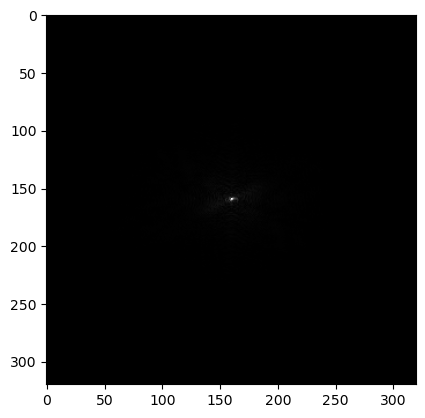

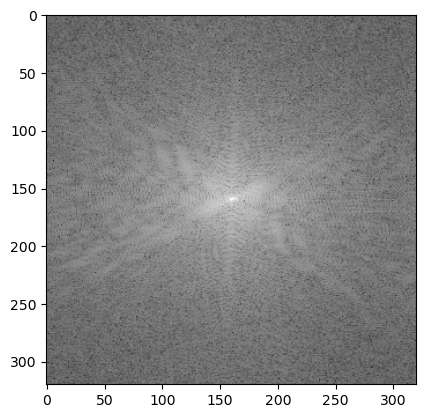

In [10]:
from matplotlib import pyplot as plt

plt.figure()
plt.imshow(single_kspace[0].abs(), cmap='gray')
plt.show()

plt.figure()
plt.imshow(torch.log(single_kspace[0].abs()), cmap='gray')
plt.show()

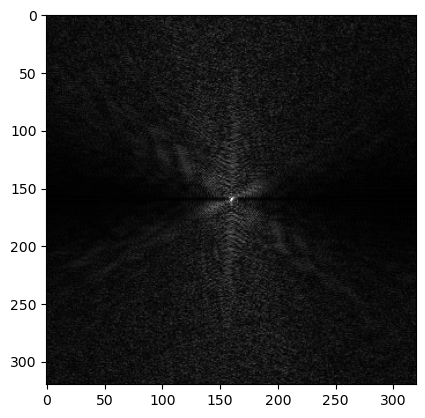

In [11]:
single_kspace_real = torch.view_as_real(single_kspace)
ln = torch.nn.LayerNorm([320, 2], dtype=single_kspace_real.dtype)
with torch.no_grad():
    single_kspace_real = ln(single_kspace_real)
single_kspace_ln = torch.view_as_complex(single_kspace_real)

plt.figure()
plt.imshow(single_kspace_ln[0].abs(), cmap='gray')
plt.show()

torch.Size([1, 320, 320])


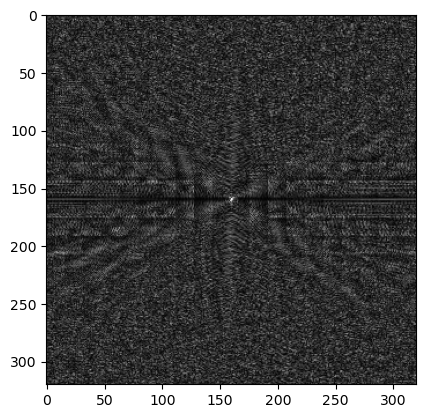

In [17]:
from einops import rearrange

single_kspace_patches = rearrange(single_kspace_ln, '1 (h p1) (w p2) -> 1 h w p1 p2', p1=16, p2=16)

single_kspace_patches_real = torch.view_as_real(single_kspace_patches)
ln = torch.nn.LayerNorm([16, 16, 2], dtype=single_kspace_patches_real.dtype)
with torch.no_grad():
    single_kspace_patches_real = ln(single_kspace_patches_real)
single_kspace_patches_ln = torch.view_as_complex(single_kspace_patches_real)

single_kspace_patches_ln = rearrange(single_kspace_patches_ln, '1 h w p1 p2 -> 1 (h p1) (w p2)', p1=16, p2=16)

print(single_kspace_patches_ln.shape)

plt.figure()
plt.imshow(single_kspace_patches_ln[0,].abs(), cmap='gray')
plt.show()